In [1]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

import FullyConnectedNN as fnn

In [2]:
#
# Analysis parameters
#
run = "edgevar"
trnDir = "data/"+run+"/train/"
testDir = "data/"+run+"/test/"
unlabeledDir = "data/"+run+"/unlabeled/"
bThetas = True

trnfnames = ["edge10", "edge40", "edge15"]
testfnames = ["edge10", "edge40", "edge15"]
unlabeledfnames = ["edge15", "edge15.25", "edge15.5", "edge15.75", "edge16",
                   "edge16.25", "edge16.5", "edge16.75", "edge17", "edge17.5",
                   "edge18", "edge18.5", "edge19", "edge19.5", "edge20", "edge21", 
                   "edge22", "edge23", "edge25", "edge30"]

In [3]:
nTrn = 0
nTrn_lbl = 0
maxTrn = 20000
# Compile training set
trn_data = []
trn_inputs = []
trn_labels = []

#for aFile in os.listdir(trnInpDir):
            
for f in trnfnames:
    print "Processing " + f + " as training data"
    thetas = []
    xs = []
    ys = []
    fin = open(trnDir+f, 'r')
    c = 0
    for line in fin.readlines():
        c +=1
        if line == "\n": continue
        if line.startswith("label"):
            # Done a block
            if len(thetas) != 400:
                print c,len(thetas)
                xs = []
                ys = []
                thetas = []
                continue
            label = [[0.], [0.]]
            idx = int(float(line.split()[1]))
            label[idx] = [1.]
            trn_labels.append(label)
            if bThetas:
                trn_inputs.append(thetas)
            else:
                trn_inputs.append(thetas + xs + ys)
            thetas = []
            xs = []
            ys = []
            nTrn+=1
            if nTrn == maxTrn: break
            continue
        spt = [float(x) for x in line.split()]
        xs.append([spt[0]])
        ys.append([spt[1]])
        thetas.append([spt[2]])

    fin.close()
#         label = [[float(x)] for x in line.split()]
#         trn_labels.append(label)
#         nTrn_lbl+=1
#         if nTrn_lbl == maxTrn: break

    if nTrn == maxTrn: break
        
for i in range(len(trn_inputs)):
    trn_data.append((np.asarray(trn_inputs[i]), np.asarray(trn_labels[i])))
    
random.shuffle(trn_data)

print "Done compiling training set"

Processing edge10 as training data
400 399
Processing edge40 as training data
400 399
Processing edge15 as training data
400 399
Done compiling training set


In [17]:
len(trn_data)

11100

In [30]:
test_data = []
test_inputs = []
test_labels = []

for f in testfnames:
    print "Adding " + f + " to test set"
    thetas = []
    xs = []
    ys = []
    fin = open(testDir+f, 'r')
    for line in fin.readlines():
        if line == "\n": continue
        if line.startswith("label"):
            # Done a block
            test_labels.append(float(line.split()[1]))
            if bThetas:
                test_inputs.append(thetas)
            else:
                test_inputs.append(thetas + xs + ys)
            thetas = []
            xs = []
            ys = []
            continue
        spt = [float(x) for x in line.split()]
        xs.append([spt[0]])
        ys.append([spt[1]])
        thetas.append([spt[2]])

    fin.close()
for i in range(len(test_inputs)):
    test_data.append((np.asarray(test_inputs[i]), np.asarray(test_labels[i])))

print "Done"

Adding edge10 to test set
Adding edge40 to test set
Adding edge15 to test set
Done


In [23]:
len(test_data)

900

In [22]:
print len(trn_data), len(test_data)

11100 900


In [26]:
nn = None

In [16]:
reload(fnn)

<module 'FullyConnectedNN' from 'FullyConnectedNN.py'>

In [33]:
if bThetas:
    nn = fnn.FullyConnectedNN([400, 100, 2])
else:
    nn = fnn.FullyConnectedNN([1200, 100, 2])
# nn = FullyConnectedNN([784, 100, 10])

#nn.train(training data, nEpoch, minibatch, eta, testdata=None)
train_params = [20, 100, 5.]
nn.train(trn_data, train_params[0], train_params[1], train_params[2], test_data)

eta  5.009375
Epoch 0 Accuracy:  0.667777777778
eta  5.005
Epoch 1 Accuracy:  0.674444444444
eta  4.993125
Epoch 2 Accuracy:  0.684444444444
eta  4.97
Epoch 3 Accuracy:  0.686666666667
eta  4.931875
Epoch 4 Accuracy:  0.691111111111
eta  4.875
Epoch 5 Accuracy:  0.7
eta  4.795625
Epoch 6 Accuracy:  0.717777777778
eta  4.69
Epoch 7 Accuracy:  0.696666666667
eta  4.554375
Epoch 8 Accuracy:  0.703333333333
eta  4.385
Epoch 9 Accuracy:  0.708888888889
eta  4.178125
Epoch 10 Accuracy:  0.715555555556
eta  3.93
Epoch 11 Accuracy:  0.711111111111
eta  3.636875
Epoch 12 Accuracy:  0.711111111111
eta  3.295
Epoch 13 Accuracy:  0.711111111111
eta  2.900625
Epoch 14 Accuracy:  0.712222222222
eta  2.45
Epoch 15 Accuracy:  0.713333333333
eta  1.939375
Epoch 16 Accuracy:  0.713333333333
eta  1.365
Epoch 17 Accuracy:  0.712222222222
eta  0.723125
Epoch 18 Accuracy:  0.712222222222
eta  0.01
Epoch 19 Accuracy:  0.712222222222


In [10]:
nnSave = nn

(array([ 10330.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   9670.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

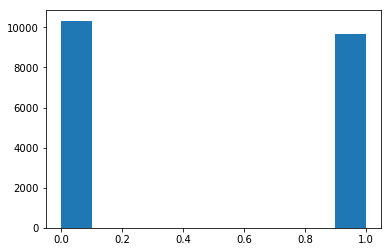

In [11]:
trnlabels = []
for i in range(0,len(trn_data)):
    trnlabels.append(np.argmax(trn_data[i][1]))

plt.hist(trnlabels)

600 372 300 206
Fraction of correct for label 1:  0.62
Fraction of correct for label 2:  0.686666666667


(array([ 466.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  434.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

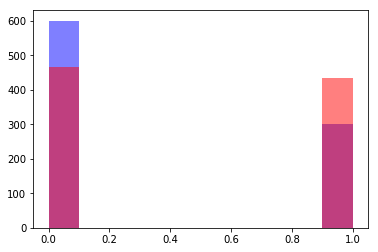

In [27]:
outs = []
labels = []
corr = []
for i in range(0,len(test_data)):
    labels.append(float(test_data[i][1]))
    outs.append(float(np.argmax(nn.feedforward(test_data[i][0]))))
    corr.append(labels[-1]==outs[-1])

ncorr1 = 0
ncorr2 = 0
n1, n2 = 0, 0
for i in range(len(labels)):
    if labels[i] == 0.:
        n1+=1
        ncorr1+=corr[i]
    elif labels[i] == 1.:
        n2+=1
        ncorr2+=corr[i]
print n1, ncorr1, n2, ncorr2
print "Fraction of correct for label 1: ", float(ncorr1)/n1
print "Fraction of correct for label 2: ", float(ncorr2)/n2
plt.hist(labels, alpha=0.5, color='b')
plt.hist(outs, alpha=0.5, color='r')

In [28]:
# Clear data for RAM
trn_data = None
test_data = None

In [29]:
edges = [15,15.25,15.75,16,16.5,17,17.5,18,19,20,23,25,30]
# edges = [15,15.25,15.5,15.75,16,16.25,16.5,16.75,17,17.5,18,18.5,19,19.5,20,21,22,23,25,30]
N = 400
L = 3.0
rho_ = [L*L*N/float(x*x) for x in edges]

unlabeledfnames = ["edge15", "edge15.25", "edge15.75", "edge16",
                   "edge16.5", "edge17", "edge17.5",
                   "edge18", "edge19", "edge20", 
                   "edge23", "edge25", "edge30"]

In [15]:
maxSample = 2000
n = 0
out_stats = [] # mean and std pairs

# unlabeledfnames = ["edge10_"]
# unlabeledfnames = []
# unlabeledfnames = ["edge10", "edge15", "edge20", "edge25_", "edge30", "edge35", "edge40"]
for f in unlabeledfnames:
    inputs = []
    filedata = []
    print "Adding " + f + " unlabeled set"
    thetas = []
    xs = []
    ys = []
    fin = open(unlabeledDir+f, 'r')
    n = 0
    for line in fin.readlines():
        if n==maxSample:
            break
        if line == "\n":
            # Done a block
            n+=1
            if bThetas:
                inputs.append(thetas)
            else:
                inputs.append(thetas + xs + ys)
            thetas = []
            xs = []
            ys = []
            continue
        spt = [float(x) for x in line.split()]
        xs.append([spt[0]])
        ys.append([spt[1]])
        thetas.append([spt[2]])
        
    fin.close()
    for i in range(len(inputs)):
#         filedata.append((np.asarray(test_inputs[i]), np.asarray(test_labels[i])))
        filedata.append((np.asarray(inputs[i])))
#     edgetestdata.append(filedata)

    outs = []
    print len(filedata)
    for i in range(0,len(filedata)):
        outs.append(np.argmax(nn.feedforward(filedata[i])))
    out_stats.append([np.average(outs), np.std(outs)])
    print out_stats[-1]


print "Done"

Adding edge15 unlabeled set
300
[0.37666666666666665, 0.48455019233190783]
Adding edge15.25 unlabeled set
2000
[0.33700000000000002, 0.47268488446321194]
Adding edge15.75 unlabeled set
2000
[0.90400000000000003, 0.2945912422323515]
Adding edge16 unlabeled set
2000
[0.88200000000000001, 0.32260812141048156]
Adding edge16.5 unlabeled set
2000
[0.85250000000000004, 0.3546036519834504]
Adding edge17 unlabeled set
2000
[0.39950000000000002, 0.48979562064191634]
Adding edge17.5 unlabeled set
2000
[0.39200000000000002, 0.4881966816765555]
Adding edge18 unlabeled set
2000
[0.84699999999999998, 0.35998749978297861]
Adding edge19 unlabeled set
2000
[0.81399999999999995, 0.38910666917954523]
Adding edge20 unlabeled set
2000
[0.63400000000000001, 0.48170945600019111]
Adding edge23 unlabeled set
2000
[0.66149999999999998, 0.47319948224823749]
Adding edge25 unlabeled set
2000
[0.66500000000000004, 0.47199046600540567]
Adding edge30 unlabeled set
2000
[0.6825, 0.46550375938331584]
Done


In [13]:
rho_

[16.0,
 15.479709755442085,
 14.512471655328799,
 14.0625,
 13.223140495867769,
 12.456747404844291,
 11.755102040816327,
 11.11111111111111,
 9.97229916897507,
 9.0,
 6.805293005671078,
 5.76,
 4.0]

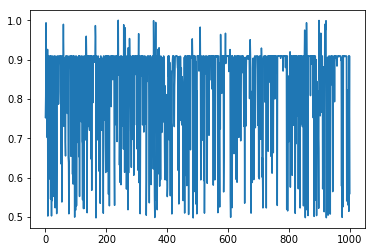

In [73]:
y = []
for i in range(len(edgetestdata[2])):
    y.append(np.max(nn.feedforward(edgetestdata[2][i])))
plt.plot(y[0:])

In [14]:
print rho_
print means

[9.0, 5.76, 4.0, 2.938775510204082, 16.0, 15.479709755442085, 14.984391259105099, 14.512471655328799, 14.0625, 13.633136094674557, 13.223140495867769, 12.83136556025841, 12.456747404844291, 11.755102040816327, 11.11111111111111, 10.51862673484295, 9.97229916897507, 9.467455621301776, 8.16326530612245, 7.43801652892562, 6.805293005671078]
[0.57235723572357233, 0.73507350735073507, 0.87478747874787477, 0.90909090909090906, 0.074999999999999997, 0.0402, 0.99009999999999998, 0.99039999999999995, 0.98480000000000001, 0.98399999999999999, 0.98560000000000003, 0.0441, 0.052400000000000002, 0.059299999999999999, 0.97899999999999998, 0.076999999999999999, 0.9748, 0.90959999999999996, 0.50549999999999995, 0.63980000000000004, 0.54800000000000004]


In [16]:
edges

[15, 15.25, 15.75, 16, 16.5, 17, 17.5, 18, 19, 20, 23, 25, 30]

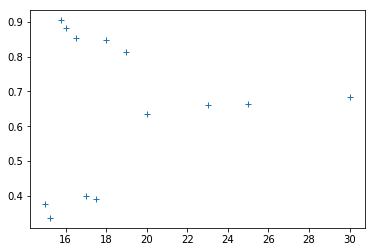

In [16]:
means = [out_stats[i][0] for i in range(len(out_stats))]
stds = [out_stats[i][1] for i in range(len(out_stats))]
# plt.plot(rho_[0:], means[0:],'+')
plt.plot(edges, means,'+')

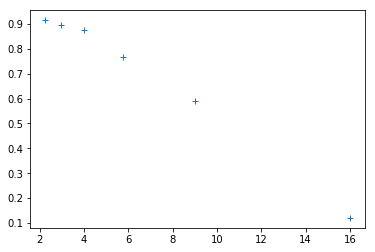

In [78]:
out_stats = [] # mean and std pairs
edges = [10,15,20,25,30,35,40]
N = 400
L = 3.0
rho_ = [L*L*N/float(x*x) for x in edges]

for j in range(len(rho_)):
    outs = []
    for i in range(0,len(edgetestdata[j])):
        outs.append(np.argmax(nn.feedforward(edgetestdata[j][i])))
    out_stats.append([np.average(outs), np.std(outs)])

means = [out_stats[i][0] for i in range(len(out_stats))]
stds = [out_stats[i][1] for i in range(len(out_stats))]
plt.plot(rho_[1:], means[1:],'+')

<Container object of 3 artists>

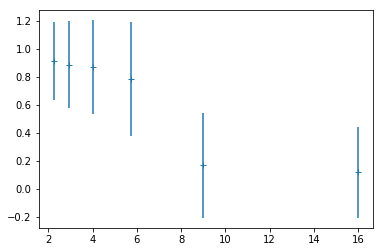

In [71]:
plt.errorbar(rho_[1:], means[1:], yerr=stds[1:], fmt='+')

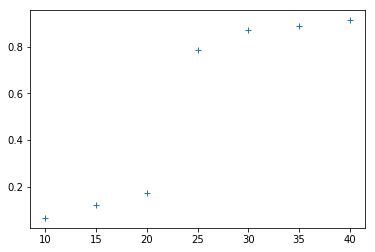

In [50]:
plt.plot(edges,out_avgs,'+')

In [41]:
nnSave = nn

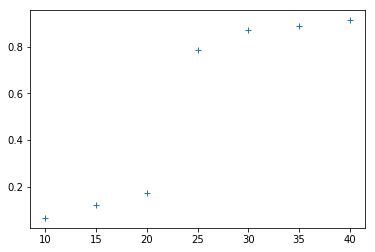

In [42]:
path = "saves/"
savetag = "incl_15Trn_2e4TrnSamp_2"
if not os.path.isfile(path+savetag+".nn"):
    plt.plot(edges,out_avgs,'+') # Seems to need me to make the plot first
    plt.gcf().savefig(path+savetag+"_output-vs-edge.png")
    fout = open(path+savetag+".nn",'w')
    s = ""
    for n in nn.sizes: s+=str(n)+" "
    s = ""
    for t in train_params: s+=str(t)+" "
    fout.write("NN sizes: " + s + "\n")
    fout.write("training params (Nepoch, minibatch, eta): " + s + "\n")
    for w,b in zip(nnSave.W,nnSave.B):
        for wj in w:
            s = ""
            for ww in wj: s+= str(float(ww))+" "
            fout.write(s)
        s = ""
        fout.write("\n")
        for bj in b:
            s += str(float(bj)) + " "
        fout.write(s)
        fout.write("\n")
            
        
else: print "File tag already taken"

In [47]:
N = 400
L = 3.0
rho_ = [L*L*N/float(x*x) for x in edges]
print rho_

[36.0, 16.0, 9.0, 5.76, 4.0, 2.938775510204082, 2.25]


In [ ]:
import mnist_loader
trndat, valdat, testdat = mnist_loader.load_data_wrapper()

In [ ]:
nn = FullyConnectedNN([784, 100, 10])
nn.train(trndat, 21, 100, 3., testdat)